In [1]:
import wandb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme()
# plt.style.use('seaborn-darkgrid')
plt.rcParams["axes.edgecolor"] = "0.25"
plt.rcParams["axes.linewidth"] = 1.2
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = "Lato"
legend_properties = {'weight':'normal'}
plt.rcParams['figure.constrained_layout.use'] = True
plt.rcParams["font.size"] = 12
plt.rcParams["font.weight"] = "bold"

In [15]:
RUNS_DICT = {
    "vanilla_rl_microwave": [
        "dashora7/online-franka/zqutn8ni",
        "dashora7/online-franka/p029j9hu",
        "dashora7/online-franka/mumd0imz",
        "dashora7/online-franka/8e76ycn5",
        "dashora7/online-franka/5dweb821",
        "dashora7/online-franka/3zxx4dqk"],
    "vanilla_rl_hingecabinet": None,
    "vanilla_rl_slidecabinet": [
        "dashora7/online-franka/huhl1zj7",
        "dashora7/online-franka/6fa6wzio",
        "dashora7/online-franka/utzwopoc",
        "dashora7/online-franka/5fiudi90",
        "dashora7/online-franka/8urlz8u9"
        ],
    "icvf_ataricnn_seohongds_rl_microwave": [
         "dashora7/online-franka/j2mvvomm",
         "dashora7/online-franka/ombfczol",
         "dashora7/online-franka/3k7bzbml",
         "dashora7/online-franka/0gg2wxvt",
         "dashora7/online-franka/mcqrlg6g",
         "dashora7/online-franka/j7ppo5z0"],
    "vf_ataricnn_customds_rl_minusrnd_microwave": [
         "dashora7/online-franka/wr93nqo0",
         "dashora7/online-franka/op1v8xr8",
         "dashora7/online-franka/0r408e6o",
         "dashora7/online-franka/g4giaoet",
         "dashora7/online-franka/njp5zdsq",
         "dashora7/online-franka/v608dnjx"],
    "icvf_ataricnn_seohongds_rl_minusrnd_slidecabinet": [
         "dashora7/online-franka/7t74dbxv",
         "dashora7/online-franka/swohrksw",
         "dashora7/online-franka/piplj7us",
         "dashora7/online-franka/fvosg6iw",
         "dashora7/online-franka/557fnxay",
         "dashora7/online-franka/5kg7c68q"
    ],
    "vanilla_rl_fs40_jvel_microwave": [
        "dashora7/online-franka-reboot/2sfowrsl",
        "dashora7/online-franka-reboot/nhp44t9z",
        "dashora7/online-franka-reboot/0wdpah62",
        "dashora7/online-franka-reboot/gdj1d2zb",
        "dashora7/online-franka-reboot/8iba0xso",
        "dashora7/online-franka-reboot/i8d6r4yn"
    ],
    "icvf-fails-ego4d_rl_fs40_jvel_microwave": [
        "dashora7/online-franka-reboot/mu88ohbb",
        "dashora7/online-franka-reboot/0l0tt0v2",
        "dashora7/online-franka-reboot/qhdk1wt2",
        "dashora7/online-franka-reboot/clbk5fy1",
        "dashora7/online-franka-reboot/yd2252f9",
        "dashora7/online-franka-reboot/46k6ucxt"
    ],
    "rlpd-fails_fs40_jvel_microwave": [
        "dashora7/online-franka-reboot/uyq00tnl",
        "dashora7/online-franka-reboot/f91dcudo",
        "dashora7/online-franka-reboot/0w0s8s3k",
        "dashora7/online-franka-reboot/oj6hmkgq",
        "dashora7/online-franka-reboot/buiwh764",
        "dashora7/online-franka-reboot/ta03nat3"
    ],
    "icvf-fails_rl_fs40_jvel_microwave": [
        "dashora7/online-franka-reboot/e7qi6wvt",
        "dashora7/online-franka-reboot/6zbfv4oa",
        "dashora7/online-franka-reboot/4t0ztv1w",
        "dashora7/online-franka-reboot/mceto65c",
        "dashora7/online-franka-reboot/dvwprzt8",
        "dashora7/online-franka-reboot/0a1sp16x"
    ],
    
    
    
    # NEW MICRO RUNS (weirdly not reproducing, will need to look into this more)
    
    "micro-rlpd-icvf-ego4d": [
        "dashora7/final-online-franka/yw66jdip",
        "dashora7/final-online-franka/u7ku4pkc",
        "dashora7/final-online-franka/pgftixx8",
        "dashora7/final-online-franka/k8pfhgi1",
        "dashora7/final-online-franka/3ulqexdu",
        "dashora7/final-online-franka/19gz1epj",
    ],
    "micro-rlpd-icvf": [
        "dashora7/final-online-franka/dcdgq9y7",
        "dashora7/final-online-franka/gtmricgq",
        "dashora7/final-online-franka/yu0r6kka",
        "dashora7/final-online-franka/8w1jblup",
        "dashora7/final-online-franka/r4wbvzss",
        "dashora7/final-online-franka/83ew16cv",
    ],
    "micro-rlpd": [
        "dashora7/final-online-franka/afu35jmz",
        "dashora7/final-online-franka/8pvg556f",
        "dashora7/final-online-franka/cx50n983",
        "dashora7/final-online-franka/gtxfyofn",
        "dashora7/final-online-franka/1c82yn6d",
        "dashora7/final-online-franka/gow5ib76",
    ],
    "micro": [
        "dashora7/final-online-franka/lcquv011",
        "dashora7/final-online-franka/9tcb6m9j",
        "dashora7/final-online-franka/1qnp45l9",
        "dashora7/final-online-franka/h280d2ll",
        "dashora7/final-online-franka/c1lbqhoy",
        "dashora7/final-online-franka/9d7fft65",
    ],
    
    # NEW HINGE RUNS
    "hinge-rlpd-icvf-ego4d": [
        "dashora7/final-online-franka/3qkj5j30",
        "dashora7/final-online-franka/zd4lea4x",
        "dashora7/final-online-franka/0kt1qnzf",
        "dashora7/final-online-franka/1hqxuzwj",
        "dashora7/final-online-franka/egpycrvz",
        "dashora7/final-online-franka/24mu3pcv",
    ],
    "hinge-rlpd-icvf": [
        "dashora7/final-online-franka/6vwoqwuq",
        "dashora7/final-online-franka/3yijjnf5",
        "dashora7/final-online-franka/m4877y34",
        "dashora7/final-online-franka/7xpvalda",
        "dashora7/final-online-franka/6srhf4zp",
        "dashora7/final-online-franka/uyxnqq9s",
    ],
    "hinge-rlpd": [
        "dashora7/final-online-franka/drna2zba",
        "dashora7/final-online-franka/9o13ddp4",
        "dashora7/final-online-franka/cqb25wmo",
        "dashora7/final-online-franka/5n3hlksg",
        "dashora7/final-online-franka/yc478ioy",
        "dashora7/final-online-franka/qtym3r0f",
    ],
    "hinge": [
        "dashora7/final-online-franka/awo1veha",
        "dashora7/final-online-franka/bpi67izt",
        "dashora7/final-online-franka/e4r2wqxo",
        "dashora7/final-online-franka/079yvhvx",
        "dashora7/final-online-franka/hohysxv9",
        "dashora7/final-online-franka/xpwv3ik2",
    ],
    
    # NEW SLIDE RUNS
    "slide-rlpd-icvf-ego4d": [
        "dashora7/final-online-franka/p1hcx9pn",
        "dashora7/final-online-franka/gik6z9wb",
        "dashora7/final-online-franka/13p1313l",
        "dashora7/final-online-franka/ajmdq1qq",
        "dashora7/final-online-franka/sysp5ocx",
        "dashora7/final-online-franka/8qntoaj3",
    ],
    "slide-rlpd-icvf": [
        "dashora7/final-online-franka/9t8ldp7c",
        "dashora7/final-online-franka/vafiipqk",
        "dashora7/final-online-franka/f4lrwqa0",
        "dashora7/final-online-franka/c2za1dyx",
        "dashora7/final-online-franka/hunjin8p",
        "dashora7/final-online-franka/ser1bmbu",
    ],
    "slide-rlpd": [
        "dashora7/final-online-franka/si4azpxk",
        "dashora7/final-online-franka/knxmq1vk",
        "dashora7/final-online-franka/kx6e3jc8",
        "dashora7/final-online-franka/d35eu2jg",
        "dashora7/final-online-franka/zqatdlv4",
        "dashora7/final-online-franka/ia1i9jq8",
    ],
    "slide": [
        "dashora7/final-online-franka/oj8vnr0o",
        "dashora7/final-online-franka/25c0c034",
        "dashora7/final-online-franka/9qv56ra1",
        "dashora7/final-online-franka/pscqes2w",
        "dashora7/final-online-franka/37fz4aad",
        "dashora7/final-online-franka/amxfccpe",
    ],
    
}

In [7]:
api = wandb.Api()

def compute_mean_std_reward(run_name, end=500000):
    seed_run_ids = RUNS_DICT[run_name]
    master_rews = []
    masters_steps = []
    for run_id in seed_run_ids:
        run = api.run(run_id)
        history = run.history(
            samples=end,
            keys=["_step", "evaluation/return"],
            pandas=False)
        stepnums = []
        eval_rews = []
        for log_entry in history:
            eval_rew = log_entry["evaluation/return"]
            step = log_entry["_step"]
            stepnums.append(step)
            eval_rews.append(eval_rew)
            if step == end:
                break
        if stepnums[-1] < end:
            assert eval_rews[-1] >= 0, "Run did not reach 500K steps and was at 0 reward"
            continue_data(stepnums, eval_rews, end)
            print(f"Continued run {run_id} till {end} steps")
        # print("Run ID:", run_id, "Number of records:", len(stepnums), "Steps till", stepnums[-1])
        master_rews.append(eval_rews)
        masters_steps.append(stepnums)
        
    rew_array = np.stack(master_rews)
    assert all(len(master_rews[0]) == len(rewards) for rewards in master_rews), "Reward lengths do not match"
    assert all(masters_steps[0] == steplist for steplist in masters_steps), "Step numbers do not match"
    means = np.mean(rew_array, axis=0)
    stds = np.std(rew_array, axis=0)
    x = masters_steps[0]
    return x, means, stds

def smooth_data(step, data, window=10):
    smoothed_data = []
    for i in range(len(data)):
        start = max(0, i - window)
        end = min(len(data), i + window)
        smoothed_data.append(np.mean(data[start:end]))
    return smoothed_data


# Use if there's a success that had its job terminated and should be extended to 500K
# Note: it's not fair to extend 0 reward data, the method could still succeed
def continue_data(step, data, end_step):
    last_step = step[-1]
    delta = last_step - step[-2]
    last_data = data[-1]
    if last_step < end_step:
        step.extend(range(last_step, end_step + 1, delta)[1:])
        data.extend([last_data] * ((end_step - last_step + 1) // delta))

(-1.0, 80.0)

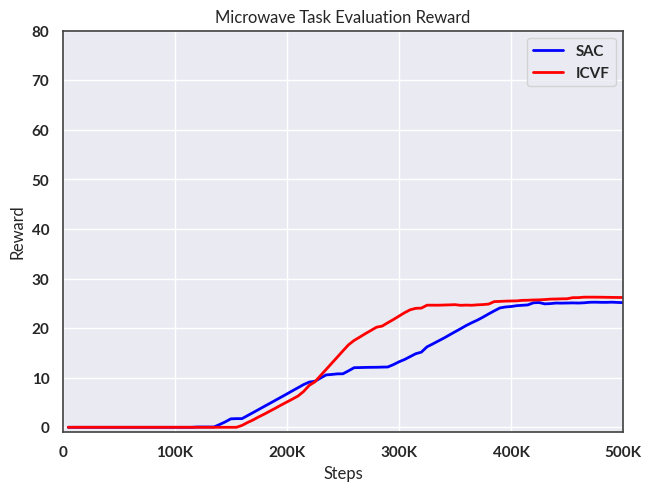

In [5]:
x, means, stds = compute_mean_std_reward("vanilla_rl_microwave")
means_smoothed = smooth_data(x, means)
plt.plot(x, means_smoothed, label="SAC", color="blue", linewidth=2)
x, means, stds = compute_mean_std_reward("icvf_ataricnn_seohongds_rl_microwave")
means_smoothed = smooth_data(x, means)
plt.plot(x, means_smoothed, label="ICVF", color="red", linewidth=2)
plt.title("Microwave Task Evaluation Reward")
plt.legend()
plt.xlabel("Steps")
plt.ylabel("Reward")
plt.xlim(0, 500000)
plt.xticks(ticks=[0, 100000, 200000, 300000, 400000, 500000], labels=["0", "100K", "200K", "300K", "400K", "500K"])
plt.ylim(-1, 80)

In [ ]:
x, means, stds = compute_mean_std_reward("vanilla_rl_fs40_jvel_microwave")
means_smoothed = smooth_data(x, means)
plt.plot(x, means_smoothed, label="SAC", color="blue", linewidth=2)

x, means, stds = compute_mean_std_reward("icvf-fails-ego4d_rl_fs40_jvel_microwave")
means_smoothed = smooth_data(x, means)
plt.plot(x, means_smoothed, label="SAC w/ ICVF (Fails + Ego4D)", color="red", linewidth=2)

x, means, stds = compute_mean_std_reward("rlpd-fails_fs40_jvel_microwave")
means_smoothed = smooth_data(x, means)
plt.plot(x, means_smoothed, label="RLPD (Fails)", color="orange", linewidth=2)

x, means, stds = compute_mean_std_reward("icvf-fails_rl_fs40_jvel_microwave")
means_smoothed = smooth_data(x, means)
plt.plot(x, means_smoothed, label="SAC w/ ICVF (Fails)", color="green", linewidth=2)



plt.title("Microwave Task Evaluation Reward")
plt.legend()
plt.xlabel("Steps")
plt.ylabel("Reward")
plt.xlim(0, 500000)
plt.xticks(ticks=[0, 100000, 200000, 300000, 400000, 500000], labels=["0", "100K", "200K", "300K", "400K", "500K"])
plt.ylim(-1, 80)

(-1.0, 40.0)

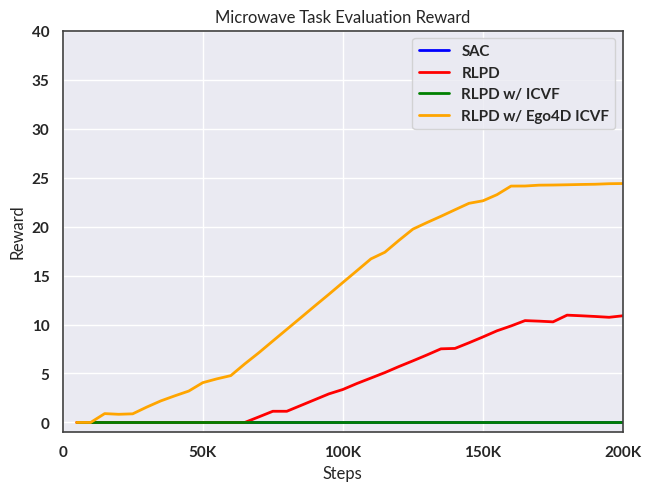

In [11]:
x, means, stds = compute_mean_std_reward("micro", end=200000)
means_smoothed = smooth_data(x, means)
plt.plot(x, means_smoothed, label="SAC", color="blue", linewidth=2)

x, means, stds = compute_mean_std_reward("micro-rlpd", end=200000)
means_smoothed = smooth_data(x, means)
plt.plot(x, means_smoothed, label="RLPD", color="red", linewidth=2)

x, means, stds = compute_mean_std_reward("micro-rlpd-icvf", end=200000)
means_smoothed = smooth_data(x, means)
plt.plot(x, means_smoothed, label="RLPD w/ ICVF", color="green", linewidth=2)

x, means, stds = compute_mean_std_reward("micro-rlpd-icvf-ego4d", end=200000)
means_smoothed = smooth_data(x, means)
plt.plot(x, means_smoothed, label="RLPD w/ Ego4D ICVF", color="orange", linewidth=2)





plt.title("Microwave Task Evaluation Reward")
plt.legend()
plt.xlabel("Steps")
plt.ylabel("Reward")
plt.xlim(0, 200000)
plt.xticks(ticks=[0, 50000, 100000, 150000, 200000], labels=["0", "50K", "100K", "150K", "200K"])
plt.ylim(-1, 40)

(-1.0, 60.0)

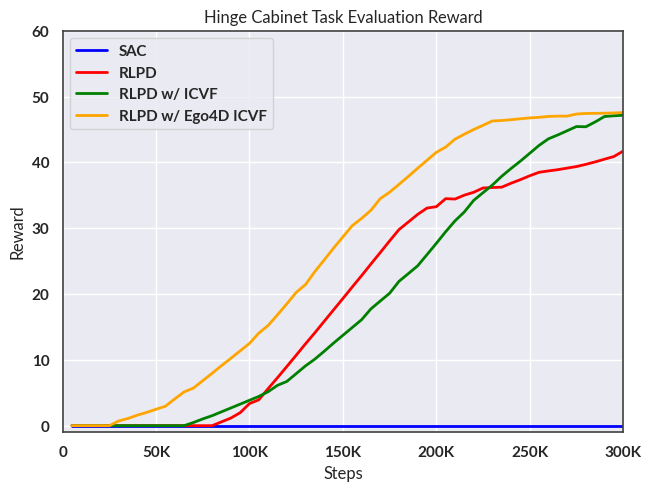

In [14]:
x, means, stds = compute_mean_std_reward("hinge", end=300000)
means_smoothed = smooth_data(x, means)
plt.plot(x, means_smoothed, label="SAC", color="blue", linewidth=2)

x, means, stds = compute_mean_std_reward("hinge-rlpd", end=300000)
means_smoothed = smooth_data(x, means)
plt.plot(x, means_smoothed, label="RLPD", color="red", linewidth=2)

x, means, stds = compute_mean_std_reward("hinge-rlpd-icvf", end=300000)
means_smoothed = smooth_data(x, means)
plt.plot(x, means_smoothed, label="RLPD w/ ICVF", color="green", linewidth=2)

x, means, stds = compute_mean_std_reward("hinge-rlpd-icvf-ego4d", end=300000)
means_smoothed = smooth_data(x, means)
plt.plot(x, means_smoothed, label="RLPD w/ Ego4D ICVF", color="orange", linewidth=2)





plt.title("Hinge Cabinet Task Evaluation Reward")
plt.legend()
plt.xlabel("Steps")
plt.ylabel("Reward")
plt.xlim(0, 300000)
plt.xticks(ticks=[0, 50000, 100000, 150000, 200000, 250000, 300000], labels=["0", "50K", "100K", "150K", "200K" ,"250K", "300K"])
plt.ylim(-1, 60)

(-1.0, 80.0)

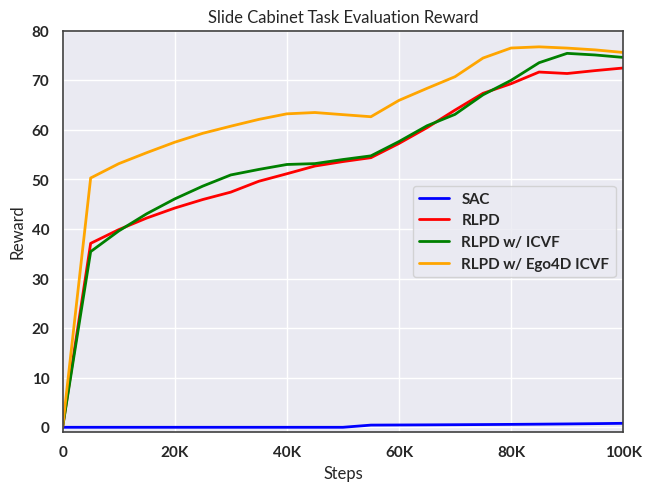

In [24]:
x, means, stds = compute_mean_std_reward("slide", end=100000)
means_smoothed = smooth_data(x, means)
means_smoothed = [0] + means_smoothed
x = [0] + x
plt.plot(x, means_smoothed, label="SAC", color="blue", linewidth=2)

x, means, stds = compute_mean_std_reward("slide-rlpd", end=100000)
means_smoothed = smooth_data(x, means)
means_smoothed = [0] + means_smoothed
x = [0] + x
plt.plot(x, means_smoothed, label="RLPD", color="red", linewidth=2)

x, means, stds = compute_mean_std_reward("slide-rlpd-icvf", end=100000)
means_smoothed = smooth_data(x, means)
means_smoothed = [0] + means_smoothed
x = [0] + x
plt.plot(x, means_smoothed, label="RLPD w/ ICVF", color="green", linewidth=2)

x, means, stds = compute_mean_std_reward("slide-rlpd-icvf-ego4d", end=100000)
means_smoothed = smooth_data(x, means)
means_smoothed = [0] + means_smoothed
x = [0] + x
plt.plot(x, means_smoothed, label="RLPD w/ Ego4D ICVF", color="orange", linewidth=2)


plt.title("Slide Cabinet Task Evaluation Reward")
plt.legend()
plt.xlabel("Steps")
plt.ylabel("Reward")
plt.xlim(0, 100000)
plt.xticks(ticks=[0, 20000, 40000, 60000, 80000, 100000], labels=["0", "20K", "40K", "60K", "80K" ,"100K"])
plt.ylim(-1, 80)